# Análise de crédito a partir de um banco de dados disponível no Kaggle

1. Utilizando um algorítmo de Machine Learning buscaremos e através de um banco de dados disponibilizado pelo Kaggle, buscaremos identificar potenciais clientes de um banco com dívidas que não irão pagá-las.

## instalando pacotes de visualização e de Machile Learning

In [1]:
!pip install plotly --upgrade

     |████████████████████████████████| 25.3 MB 7.1 MB/s eta 0:00:01     |████████████████████▌           | 16.2 MB 6.5 MB/s eta 0:00:02     |████████████████████████████    | 22.2 MB 7.1 MB/s eta 0:00:01


In [83]:
! pip install sklearn

## importação de bibliotecas

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

## importanto a base de dados

In [10]:
credito = pd.read_csv('credit_data.csv')

## explorando os dados

In [12]:
credito

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## dicionário

- clientid = número de identificação do cliente no banco de dados
- income   = salário anual 
- age      = idade
- loan     = dívida
- default  = [0] para dívida paga e [1] para dívida ativa

## visualizando os dados

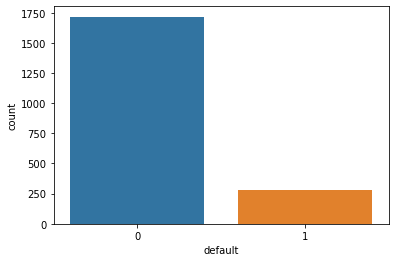

In [14]:
sns.countplot(x = credito['default']);

    * Em azul encontramos os pagadores e em laranja os devedores

## gráfico de idades

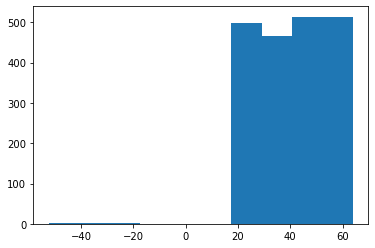

In [17]:
plt.hist(x = credito['age']);

Na base de dados há idades negativas, portanto vamos substituir essas idades pela média das idades

## Tratamento dos valores inconsistentes

In [20]:
credito[credito['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


- vamos substituir os valores negativos pela média

### Encontrando a média sem os valores negativos

In [23]:
credito['age'][credito['age']>0].mean()

40.92770044906149

### Substituindo os valores negativos pela média

In [30]:
credito.loc[credito['age']<0, 'age'] = credito['age'][credito['age']>0].mean()

### Verificando a substituição

In [35]:
credito.loc[credito['clientid'].isin([16,22,27])]

,clientid,income,age,loan,default
15,16,50501.726689,40.9277,3977.287432,0
21,22,32197.620701,40.9277,4244.057136,0
26,27,63287.038908,40.9277,9595.286289,0


## Verificando se existe valor NaN na tabela

In [36]:
credito.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

### Visualizando os valores NAN

In [37]:
credito.loc[pd.isnull(credito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


### Substituindo os valores nulos pela média

In [38]:
credito['age'].fillna(credito['age'].mean(), inplace = True)

### Verificando a substituição

In [40]:
credito.loc[credito['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


# Separação dos dados para o algorítmo

## Divisão entre previsores e alvo

In [42]:
x_credito = credito.iloc[:,1:4].values

In [43]:
x_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [44]:
y_credito = credito.iloc[:,4].values

In [45]:
y_credito

array([0, 0, 0, ..., 1, 0, 0])

## Verificando valores mínimos e máximos

In [46]:
x_credito[:,0].min(), x_credito[:,1].min(), x_credito[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [47]:
x_credito[:,0].max(), x_credito[:,1].max(), x_credito[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

# Escalonando

In [51]:
scaler_credito = StandardScaler()

In [52]:
x_credito = scaler_credito.fit_transform(x_credito)

## Verificando valores mínimos e máximos

In [53]:
x_credito[:,0].min(), x_credito[:,1].min(), x_credito[:,2].min()

(-1.7676158019964077, -1.7264154144794286, -1.4592791099462408)

In [54]:
x_credito[:,0].max(), x_credito[:,1].max(), x_credito[:,2].max()

(1.7220222385319197, 1.739366520151568, 3.0616609141708273)

# Divisão entre treinamento e teste

## Importanto biblioteca sklearn.model

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
x_credito_treinamento, x_credito_teste, y_credito_treinamento, y_credito_teste = train_test_split(x_credito, y_credito, test_size = 0.25, random_state = 0)

- utilizando 25% para teste devido a base de dados ser pequena (2000 registros)

# Salvando variáveis em arquivo

### importanto a biblioteca Pickle para salvar os dados

In [58]:
import pickle

### salvando os dados no arquivo "credito.pkl"

In [59]:
with open('credito.pkl', mode = 'wb') as f:
  pickle.dump([x_credito_treinamento, y_credito_treinamento, x_credito_teste, y_credito_teste], f)

# Usando o Naive Bayes (Algorítmo de ML)

### instanciando o Naive Bayes

In [65]:
naive_credito_dados = GaussianNB()

### Enviando os registros de treinamento

In [68]:
naive_credito_dados.fit(x_credito_treinamento, y_credito_treinamento)

GaussianNB()

### Executando o teste

In [73]:
previsao = naive_credito_dados.predict(x_credito_teste)

### Verificando a acurácia

In [75]:
accuracy_score(y_credito_teste, previsao)

0.938

    * Verificamos que a acurácia foi de 93,8%

In [81]:
print(classification_report(y_credito_teste, previsao))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



    * observamos que temos 98 % de acerto nos clientes que irão pagar a dívida, entretanto,
    * apenas 64 % de acerto nos clientes que não irão pagar a dívida.